In [47]:
import pandas as pd
import os
import numpy as np
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
benchmarks_path = Path("./benchmarks")
dfs = []
for algo in benchmarks_path.iterdir():
    for lang in algo.iterdir():
        results_path = (lang / "results.json").absolute()
        if not results_path.exists():
            continue
        df = pd.read_json(results_path)
        df['algorithm'] = algo.name
        df['language'] = lang.name
        dfs.append(df)


In [49]:
df = pd.concat(dfs)
df.to_csv("results.csv", index=False)
df

,input,time,algorithm,language
0,1,0.007167,fibonacci,deno
1,5,0.001375,fibonacci,deno
2,10,0.004333,fibonacci,deno
3,15,0.082458,fibonacci,deno
4,20,0.185583,fibonacci,deno
...,...,...,...,...
31,35,14.000000,fibonacci,v
32,40,164.000000,fibonacci,v
33,45,1882.000000,fibonacci,v
34,46,3064.000000,fibonacci,v


In [50]:
df.groupby(['algorithm', 'language', 'input']).mean()

time
algorithm language input             
fibonacci bun      1         0.003097
                   5         0.000458
                   10        0.011722
                   15        0.043542
                   20        0.052667
...                               ...
          zig      35       18.125833
                   40      201.961805
                   45     2240.930945
                   46     3649.373042
                   47     5894.267903

[135 rows x 1 columns]

In [51]:
pivot_table = pd.pivot_table(df, values='time', index=['algorithm', 'language'], columns=['input'], aggfunc="mean")
pivot_table.sort_values(by=40, ascending=True)
pivot_table.loc[:, pivot_table.columns > 25]

input                      30          35           40           45  \
algorithm language                                                    
fibonacci bun        3.339569   36.215111   398.431180  4447.566292   
          c          1.613333   15.753333   172.743333  1918.783333   
          cpp        1.357833   15.074041   167.480250  1852.483361   
          deno       4.962792   57.112583   624.645708  6868.805139   
          golang     2.001222   25.778111   228.782042  2519.269014   
          java       1.747625   18.207514   199.422236  2225.130042   
          nodejs     5.164500   56.844931   621.320958  6912.004319   
          python    60.261091  670.417309  7470.307748          NaN   
          rust       2.200097   19.671958   174.688514  1925.720458   
          swift      2.005792   21.312097   235.355347  2617.042056   
          v          1.333333   16.000000   165.666667  1836.666667   
          zig        1.635820   18.125833   201.961805  2240.930945   

input                        46           47  
algorithm language                            
fibonacci bun               NaN          NaN  
          c         3118.100000  5012.686667  
          cpp       2978.092847  4834.099111  
          deno              NaN          NaN  
          golang    4079.351056  6622.446514  
          java      3539.274556  5738.901444  
          nodejs            NaN          NaN  
          python            NaN          NaN  
          rust      3117.000209  5045.289528  
          swift     4239.164791  7017.361930  
          v         3024.666667  4903.666667  
          zig       3649.373042  5894.267903

In [56]:
# export pivot_table to markdown table
print(pivot_table.to_markdown())


|                         |           1 |           5 |          10 |         15 |        20 |       25 |       30 |       35 |       40 |      45 |      46 |      47 |
|:------------------------|------------:|------------:|------------:|-----------:|----------:|---------:|---------:|---------:|---------:|--------:|--------:|--------:|
| ('fibonacci', 'bun')    | 0.00309733  | 0.000458333 | 0.0117223   | 0.0435417  | 0.0526667 | 0.397125 |  3.33957 |  36.2151 |  398.431 | 4447.57 |  nan    |  nan    |
| ('fibonacci', 'c')      | 0           | 0           | 0           | 0          | 0.0133333 | 0.15     |  1.61333 |  15.7533 |  172.743 | 1918.78 | 3118.1  | 5012.69 |
| ('fibonacci', 'cpp')    | 0.00141667  | 0.000749667 | 0.000722333 | 0.00170833 | 0.012319  | 0.128347 |  1.35783 |  15.074  |  167.48  | 1852.48 | 2978.09 | 4834.1  |
| ('fibonacci', 'deno')   | 0.00419433  | 0.000778    | 0.00206933  | 0.030236   | 0.0883887 | 0.488736 |  4.96279 |  57.1126 |  624.646 | 6868.81 |  nan  

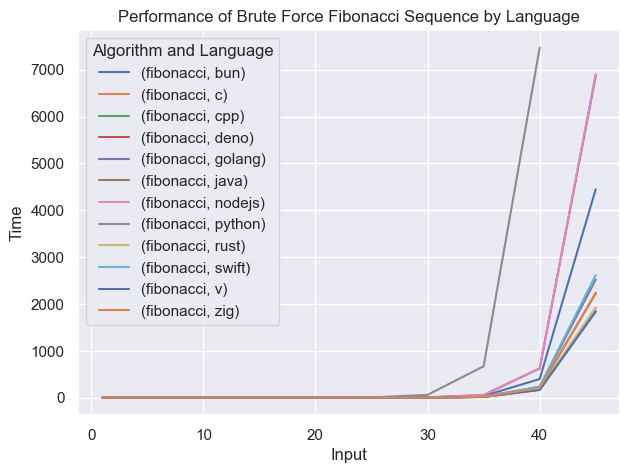

In [53]:
sns.set_theme(style="darkgrid")
# filter out column > 45
pivot_table2 = pivot_table.loc[:, pivot_table.columns <= 45]
pivot_table2.T.plot(kind='line', figsize=(10, 6))
plt.xlabel('Input')
plt.ylabel('Time')
plt.title('Performance of Brute Force Fibonacci Sequence by Language')
plt.legend(title='Algorithm and Language')
plt.gcf().set_size_inches(7, 5)
plt.grid(True)
plt.show()

In [54]:
def plot_langs(languages: list[str], min_input: int = 38):
    filtered_df = df[df['language'].isin(languages)]

    # Create a new pivot table with the filtered data
    filtered_pivot_table = pd.pivot_table(filtered_df, values='time', index=['algorithm', 'language'], columns=['input'], aggfunc="mean")
    filtered_pivot_table = filtered_pivot_table.loc[:, filtered_pivot_table.columns >= min_input]

    # Plot the filtered pivot table
    sns.set_theme(style="darkgrid")
    filtered_pivot_table.T.plot(kind='line', figsize=(10, 6))
    plt.xlabel('Input')
    plt.ylabel('Time')
    plt.title('Performance of Brute Force Fibonacci Sequence by Language (Filtered)')
    plt.legend(title='Algorithm and Language')
    plt.gcf().set_size_inches(7, 5)
    plt.grid(True)
    plt.show()

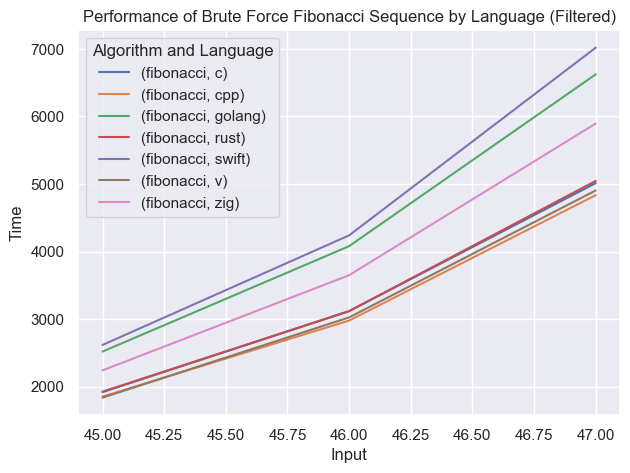

In [55]:
plot_langs(['v', 'c', 'rust', 'cpp', 'golang', 'swift', 'zig'], 44)
# plot_langs(['v', 'c', 'go', 'rust', 'cpp', 'swift', 'golang', 'java', 'zig'])
